In [5]:
import tensorflow as tf
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from data import *
from plot import *

In [6]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

df = pd.read_csv('resources/weather3.csv')
print(df)


TRAIN_SPLIT = 60000
tf.random.set_seed(13)
BATCH_SIZE = 512
BUFFER_SIZE = 60000
EVALUATION_INTERVAL = 150
EPOCHS = 2

features_considered = ['temp', 'hum', 'airpr', 'solrad', 'windvel']
features = df[features_considered]
features.index = df['date']

dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

past_history = 48
future_target = 12
STEP = 1

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)


train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32, kernel_regularizer=l2(0.005), 
                                          recurrent_regularizer=l2(0.005), bias_regularizer=l2(0.005), 
                                          return_sequences=True, input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(12))
multi_step_model.compile(optimizer='adam', loss='mse')
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

#winddir disregarded
#20 EPOCHS á 100 EVALUATION INTERVALS
#TARGET = 24 hours
#++++++++++++++++++++++++++++++++++++
#Not too many neurons to not overfit! Not too few to not underfit!
#More than one hidden layer leads to exploding gradient!
#More hidden layers can decrease chance of underfit
#Too low regularizer (~ 0.001) tends to cause underfit!
#winddir disregarded
#30 EPOCHS á 150 EVALUATION INTERVALS
#TARGET = 12 hours
#HISTORY = 48
#Adding l2 Regularizer of 0.005 to avoid overfitting
#BATCH SIZE = 512
#BUFFER SIZE = 60000

                   date  temp   hum   airpr  solrad  windvel  winddir
0      01/11/2003 01:00   9.0  65.7   983.7    11.0      2.0    184.0
1      01/11/2003 02:00   8.5  67.2   984.1    11.0      3.9    199.0
2      01/11/2003 03:00   7.3  75.3   984.5    11.0      5.4    196.0
3      01/11/2003 04:00   6.2  83.4   985.6    10.0      3.9    192.0
4      01/11/2003 05:00   5.6  92.1   986.0    11.0      4.2    212.0
...                 ...   ...   ...     ...     ...      ...      ...
79689  03/12/2012 10:00  -1.9  98.0  1011.5    62.0      0.2    187.0
79690  03/12/2012 11:00  -2.1  99.0  1010.4    48.0      3.1    188.0
79691  03/12/2012 12:00  -2.1  99.5  1009.6    29.0      1.3    177.0
79692  03/12/2012 13:00  -1.7  99.6  1008.2    40.0      2.8    189.0
79693  03/12/2012 14:00  -2.0  99.0  1007.3    31.0      4.1    192.0

[79694 rows x 7 columns]


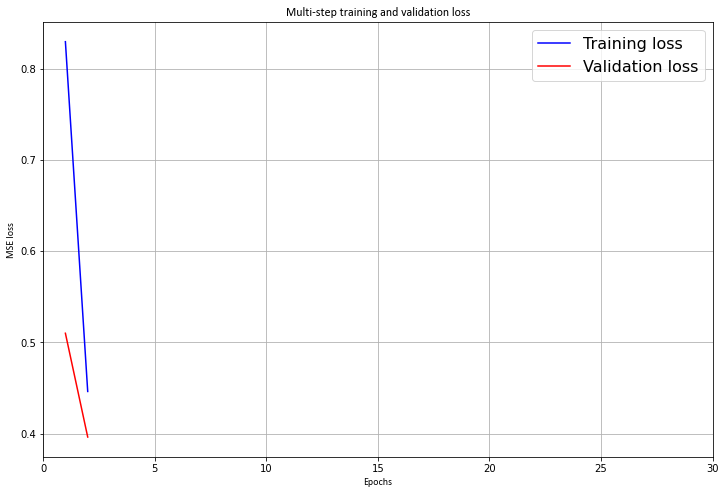

In [3]:
plot_train_history(multi_step_history, 'Multi-step training and validation loss')

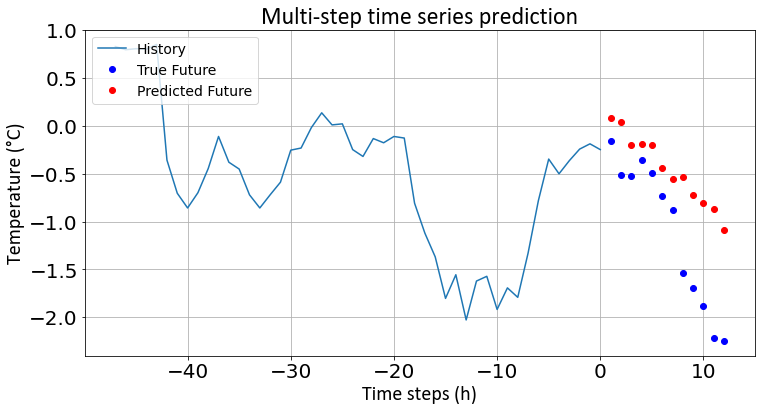

RMSE: 0.765
MAE: 0.645
ME: 1.348
SD: 0.765


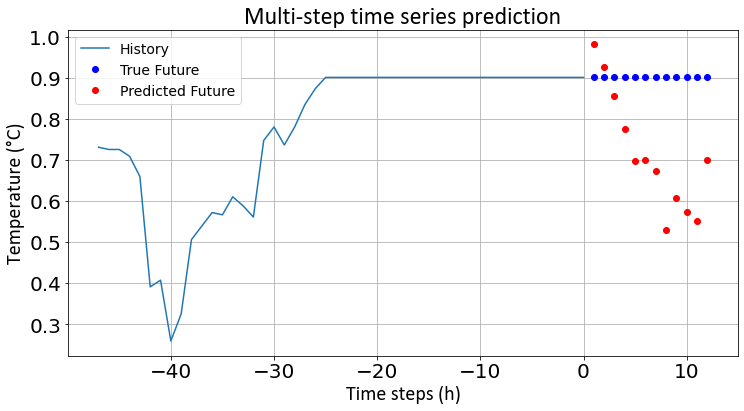

RMSE: 0.233
MAE: 0.204
ME: 0.372
SD: 0.233


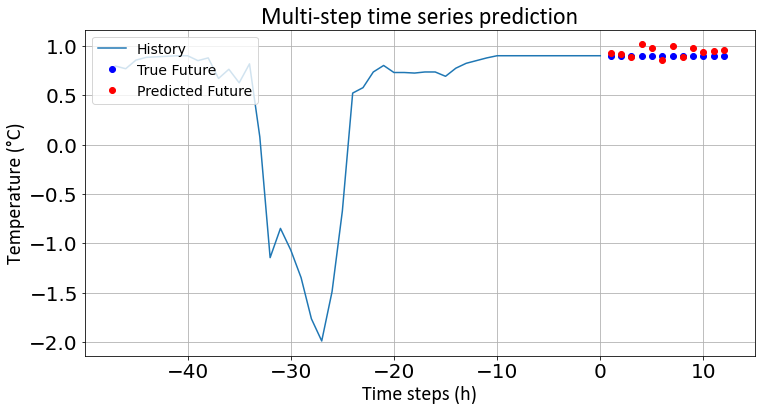

RMSE: 0.061
MAE: 0.052
ME: 0.114
SD: 0.061


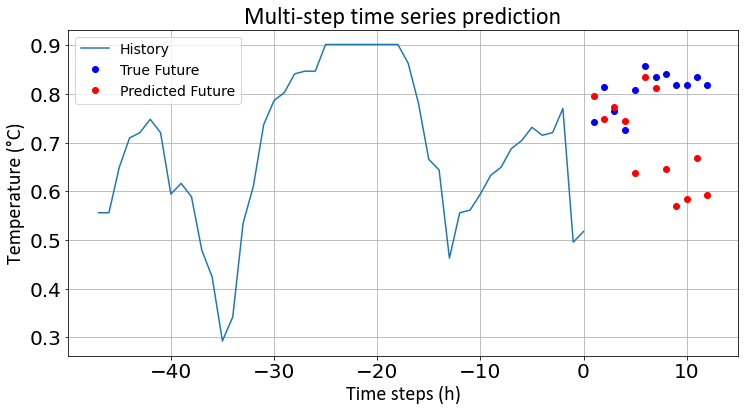

RMSE: 0.151
MAE: 0.120
ME: 0.250
SD: 0.151


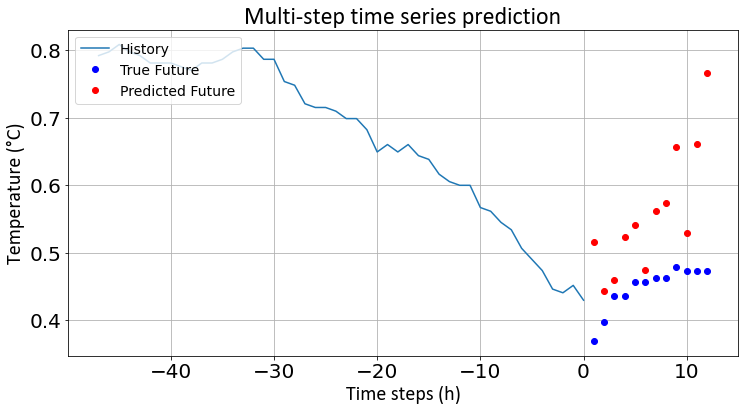

RMSE: 0.134
MAE: 0.111
ME: 0.292
SD: 0.134


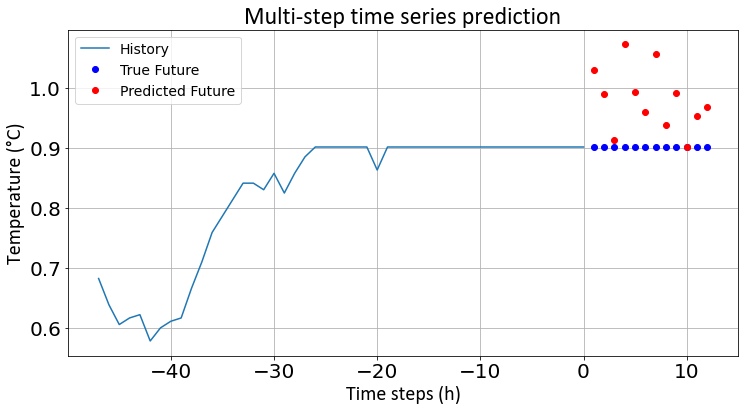

RMSE: 0.094
MAE: 0.079
ME: 0.171
SD: 0.094


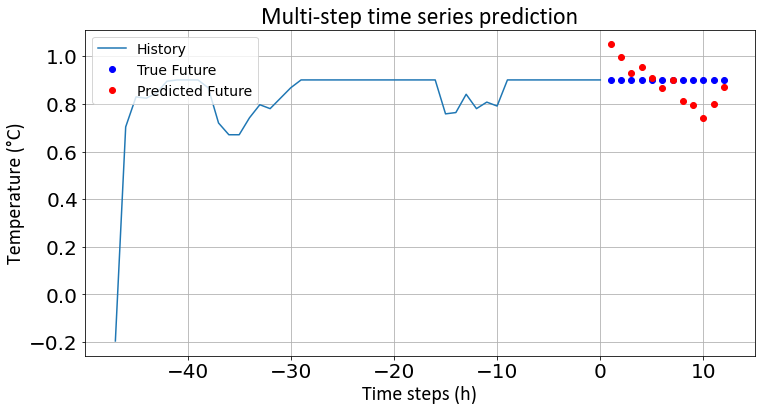

RMSE: 0.088
MAE: 0.072
ME: 0.158
SD: 0.088


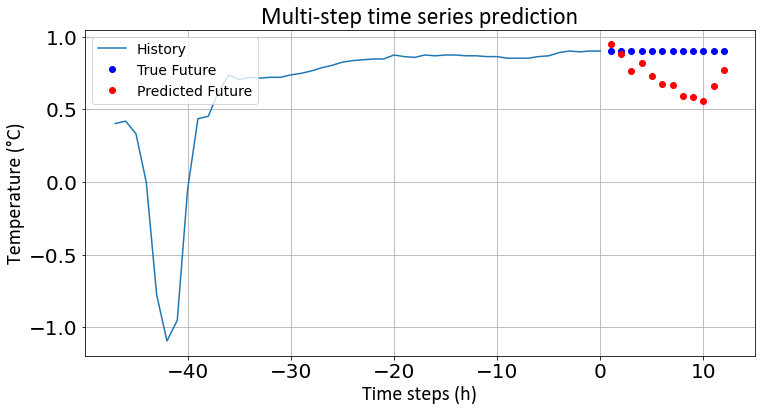

RMSE: 0.215
MAE: 0.188
ME: 0.342
SD: 0.215


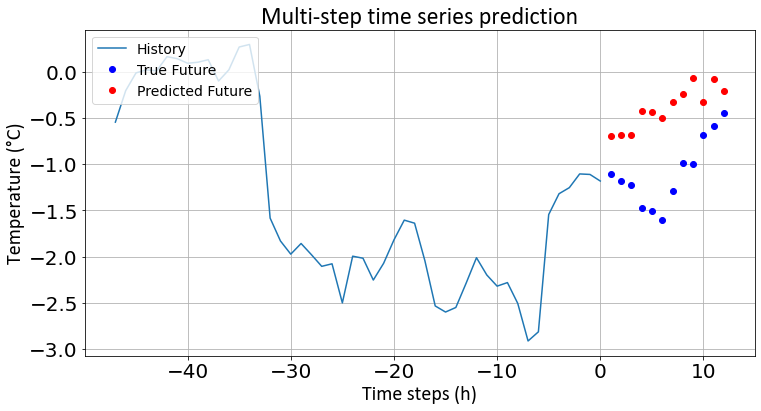

RMSE: 0.760
MAE: 0.699
ME: 1.100
SD: 0.760


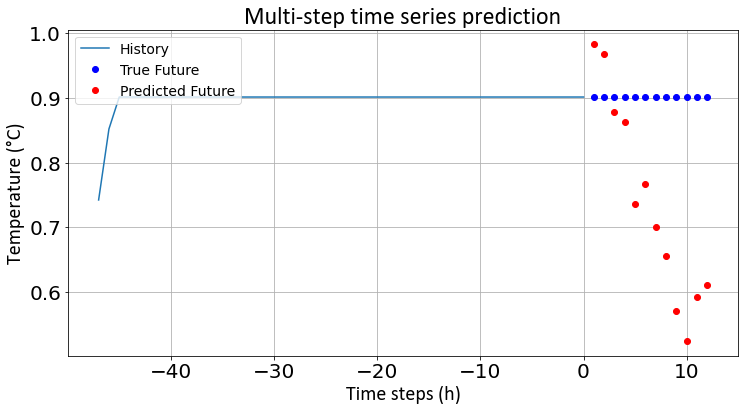

RMSE: 0.222
MAE: 0.189
ME: 0.377
SD: 0.222


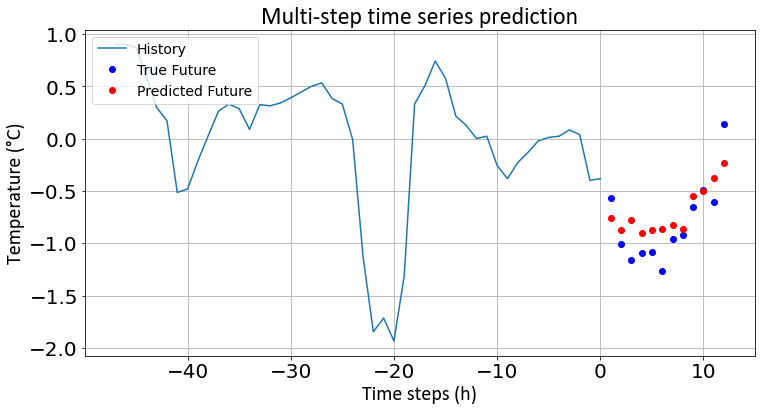

RMSE: 0.236
MAE: 0.203
ME: 0.400
SD: 0.236


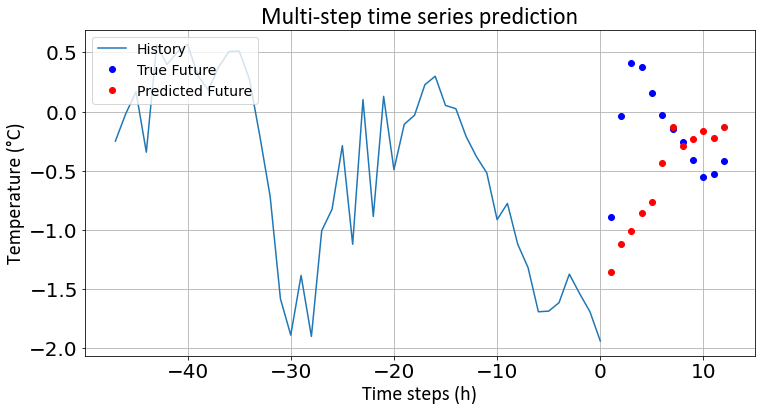

RMSE: 0.725
MAE: 0.560
ME: 1.426
SD: 0.725


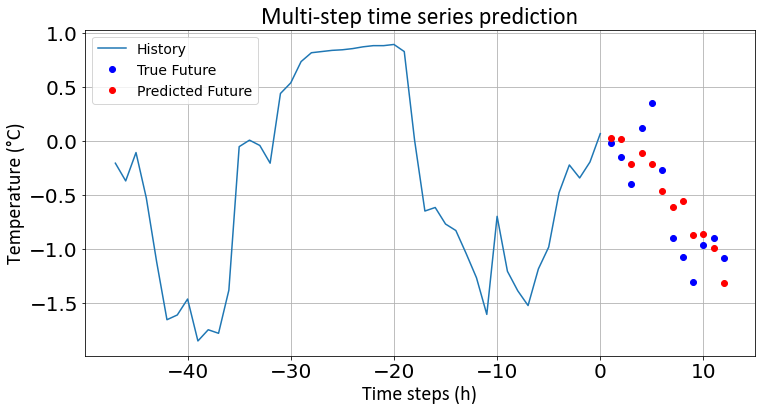

RMSE: 0.303
MAE: 0.256
ME: 0.571
SD: 0.303


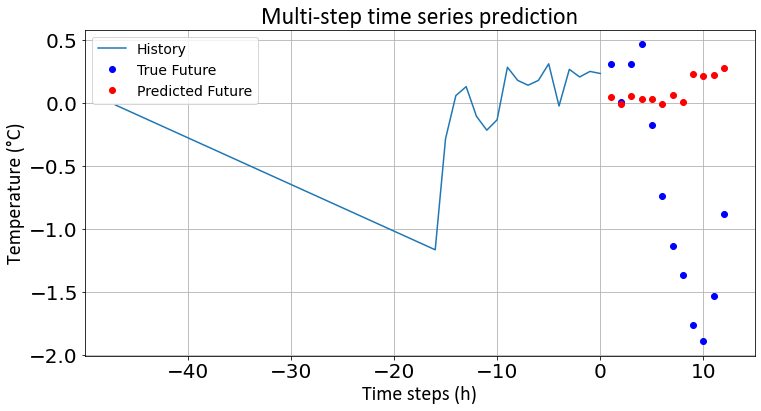

RMSE: 1.191
MAE: 0.957
ME: 2.104
SD: 1.191


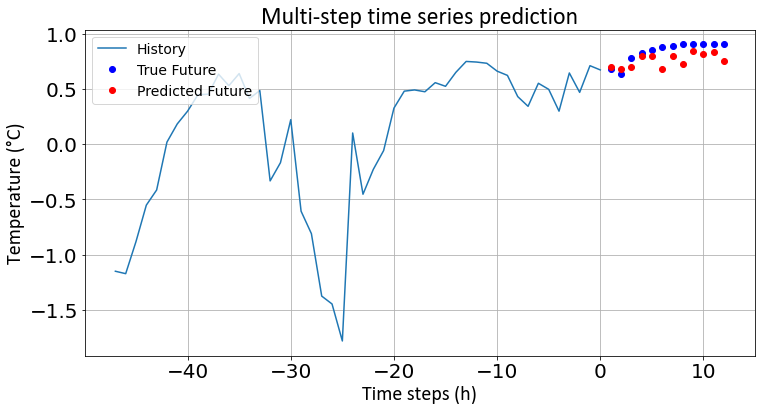

RMSE: 0.105
MAE: 0.088
ME: 0.199
SD: 0.105


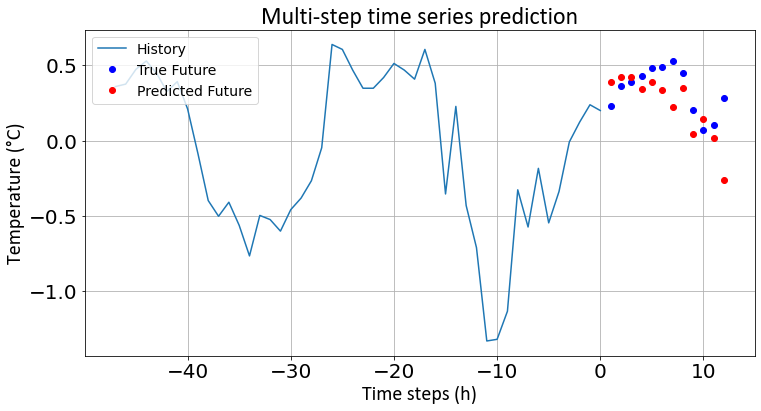

RMSE: 0.206
MAE: 0.155
ME: 0.545
SD: 0.206


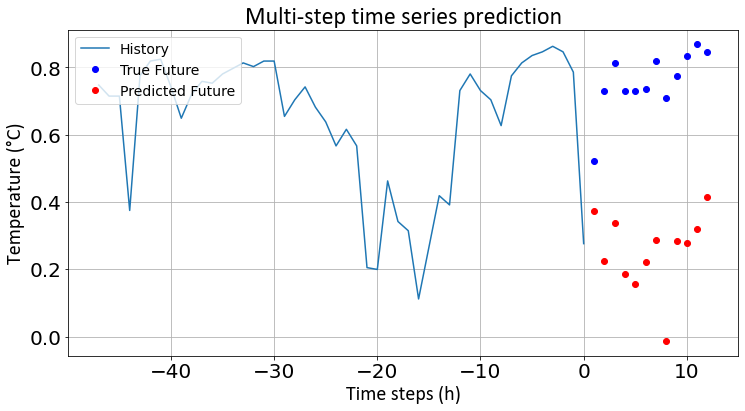

RMSE: 0.520
MAE: 0.504
ME: 0.722
SD: 0.520


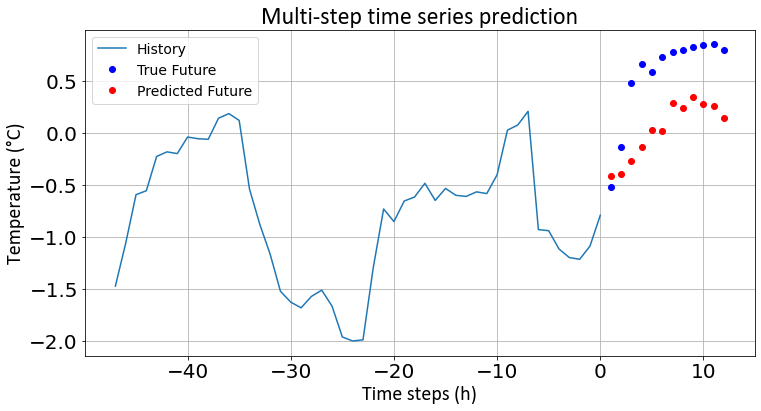

RMSE: 0.574
MAE: 0.542
ME: 0.789
SD: 0.574


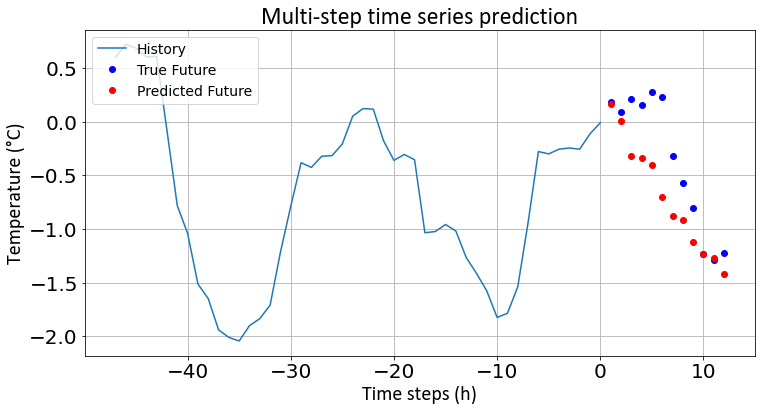

RMSE: 0.451
MAE: 0.349
ME: 0.936
SD: 0.451


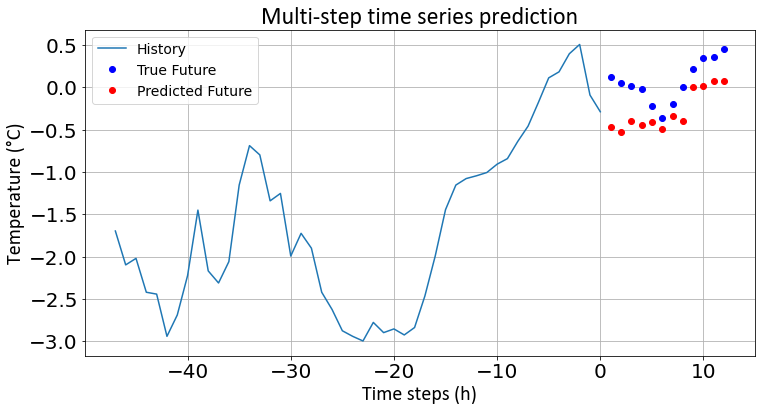

RMSE: 0.370
MAE: 0.338
ME: 0.585
SD: 0.370


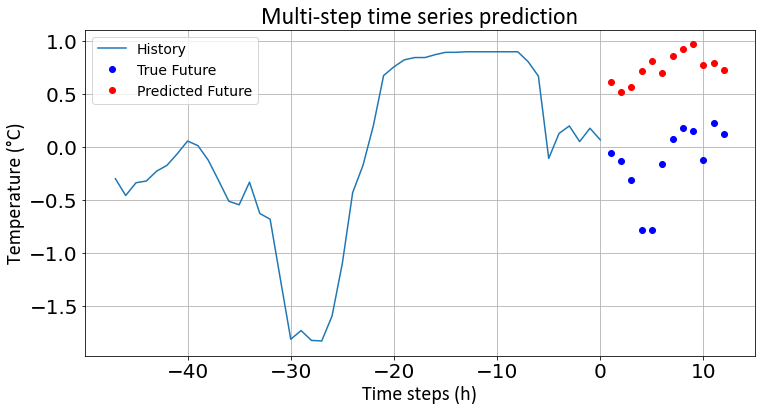

RMSE: 0.936
MAE: 0.881
ME: 1.591
SD: 0.936


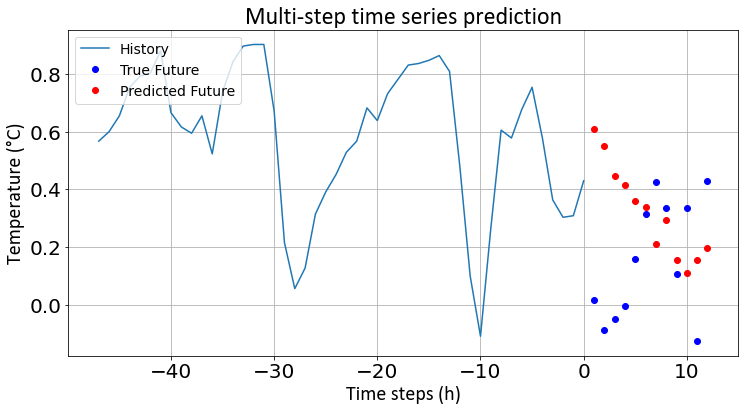

RMSE: 0.347
MAE: 0.284
ME: 0.636
SD: 0.347


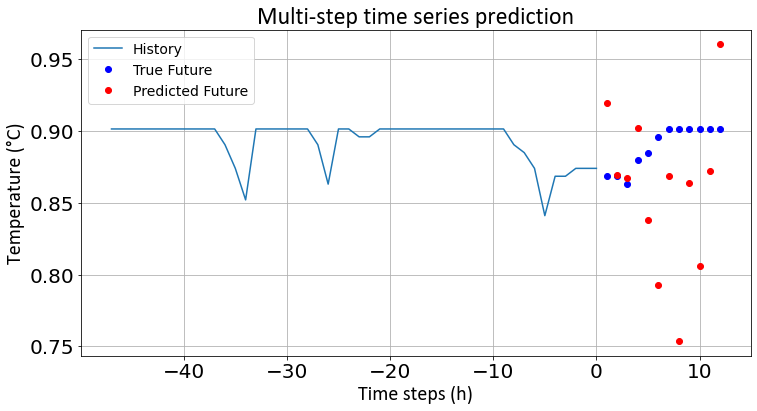

RMSE: 0.067
MAE: 0.052
ME: 0.147
SD: 0.067


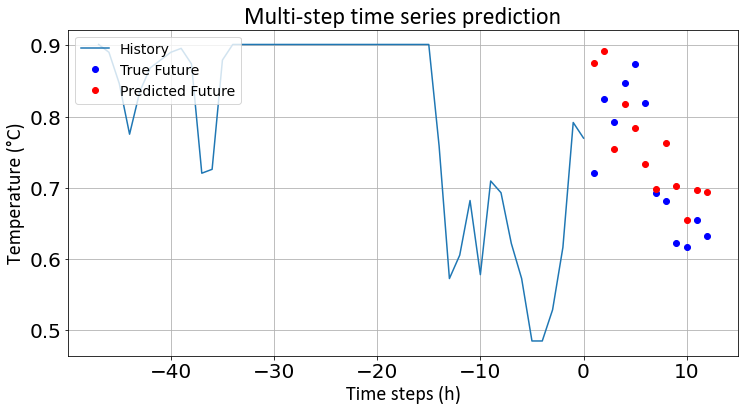

RMSE: 0.074
MAE: 0.064
ME: 0.154
SD: 0.074


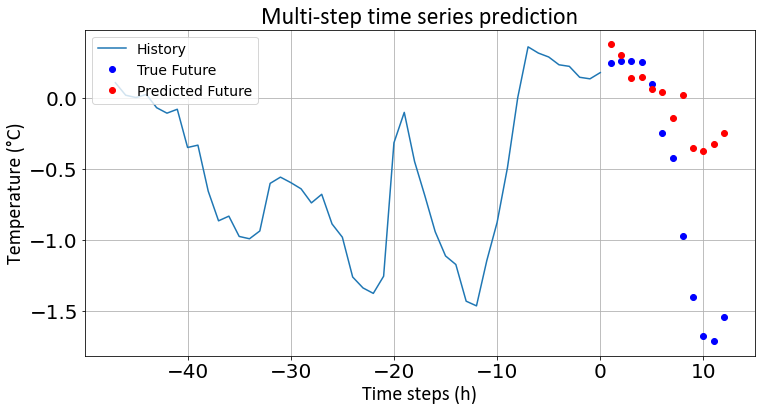

RMSE: 0.794
MAE: 0.586
ME: 1.383
SD: 0.794


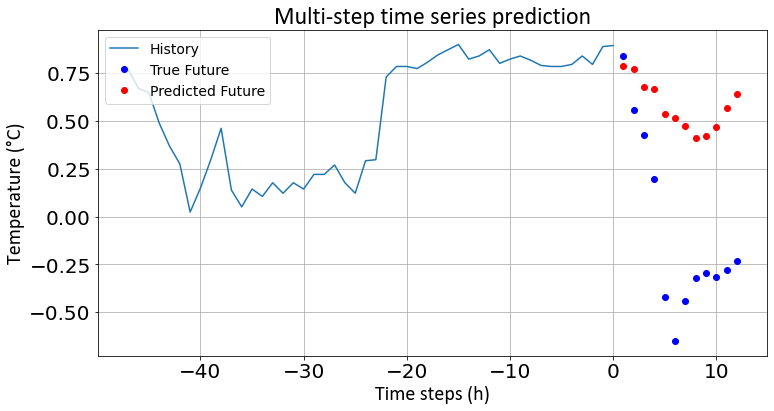

RMSE: 0.742
MAE: 0.666
ME: 1.169
SD: 0.742


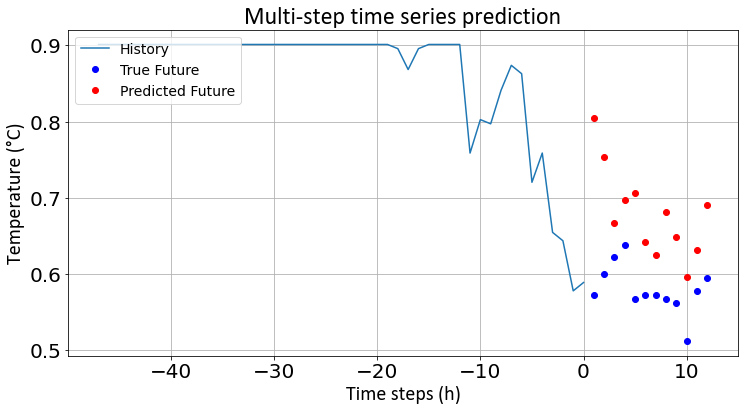

RMSE: 0.112
MAE: 0.099
ME: 0.233
SD: 0.112


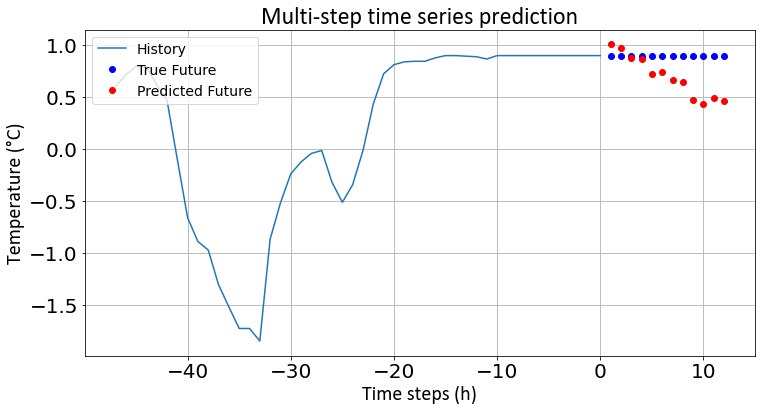

RMSE: 0.280
MAE: 0.232
ME: 0.465
SD: 0.280


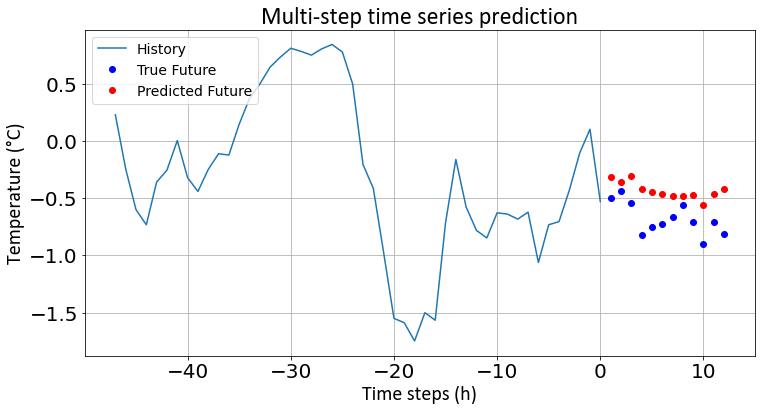

RMSE: 0.265
MAE: 0.245
ME: 0.409
SD: 0.265


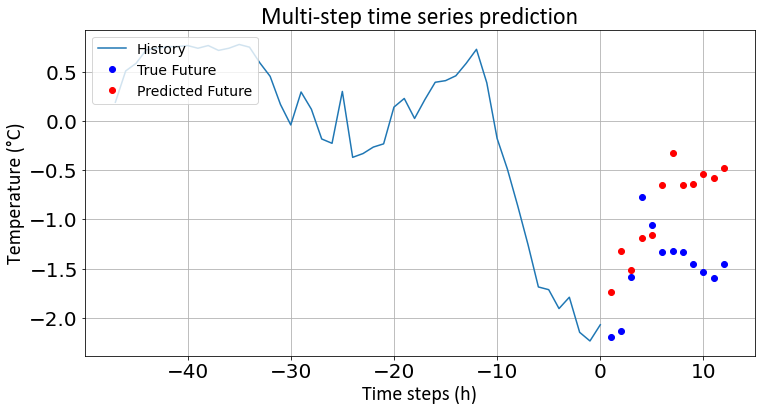

RMSE: 0.741
MAE: 0.666
ME: 1.012
SD: 0.741


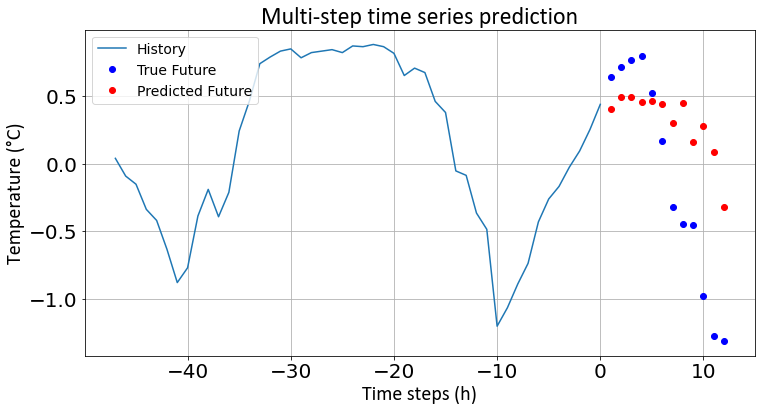

RMSE: 0.730
MAE: 0.597
ME: 1.366
SD: 0.730


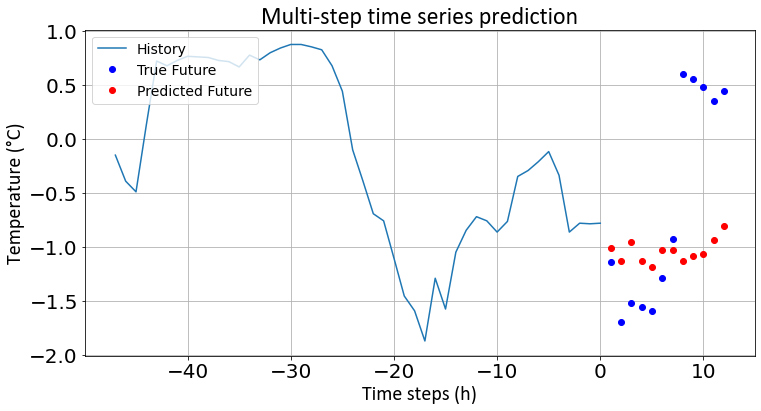

RMSE: 1.016
MAE: 0.825
ME: 1.730
SD: 1.016


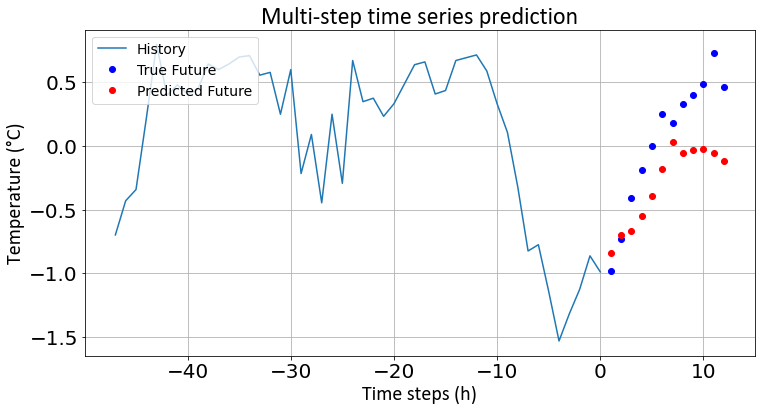

RMSE: 0.423
MAE: 0.373
ME: 0.789
SD: 0.423


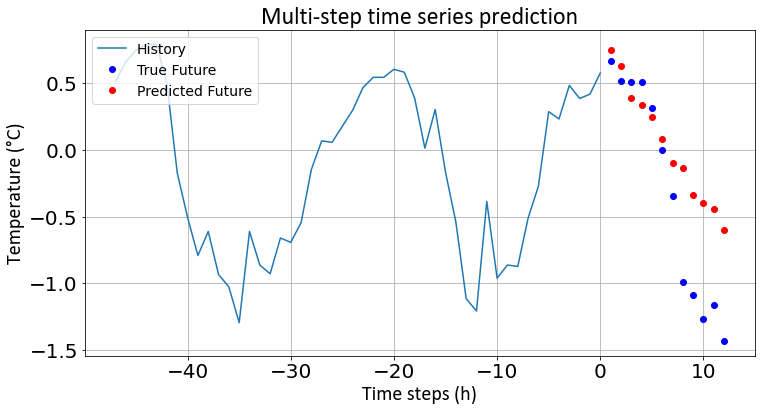

RMSE: 0.532
MAE: 0.410
ME: 0.870
SD: 0.532


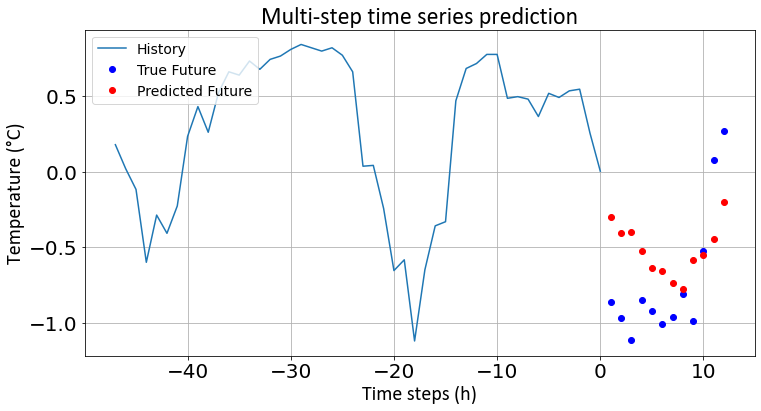

RMSE: 0.423
MAE: 0.373
ME: 0.713
SD: 0.423


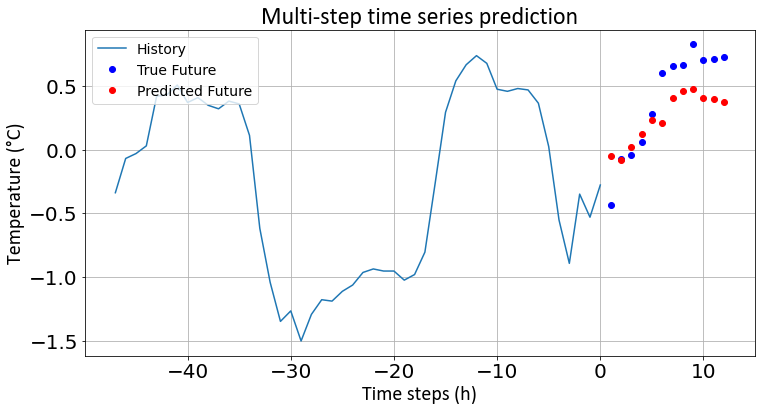

RMSE: 0.266
MAE: 0.228
ME: 0.393
SD: 0.266


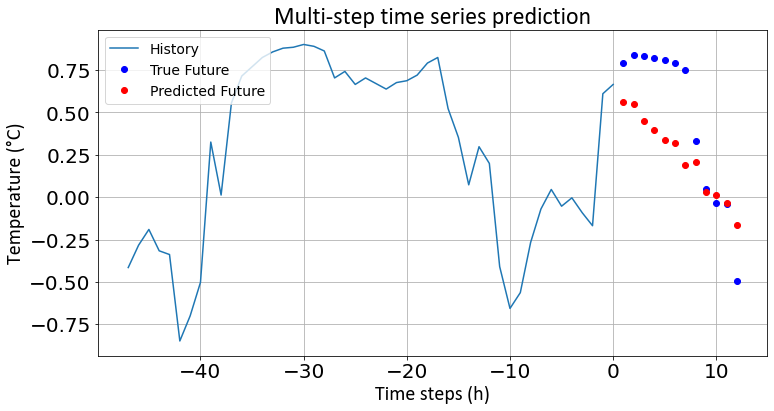

RMSE: 0.335
MAE: 0.280
ME: 0.557
SD: 0.335


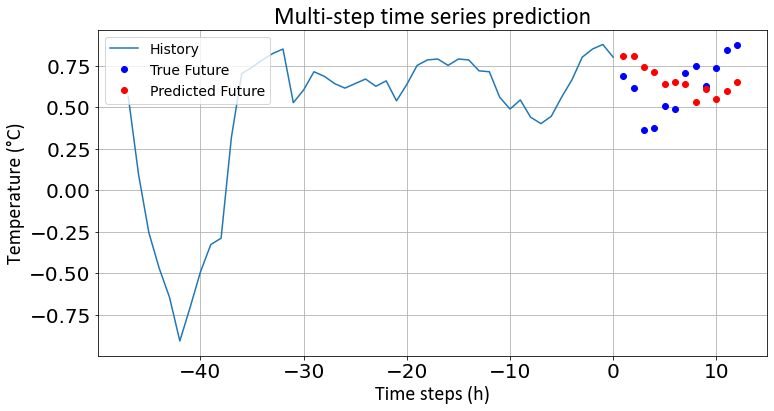

RMSE: 0.215
MAE: 0.191
ME: 0.380
SD: 0.215


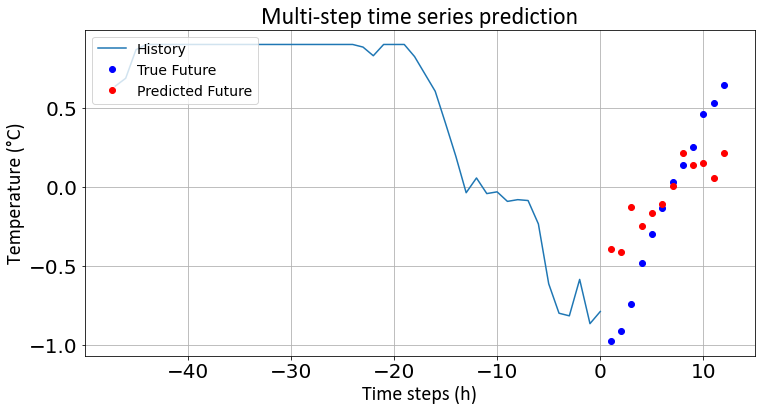

RMSE: 0.360
MAE: 0.293
ME: 0.614
SD: 0.360


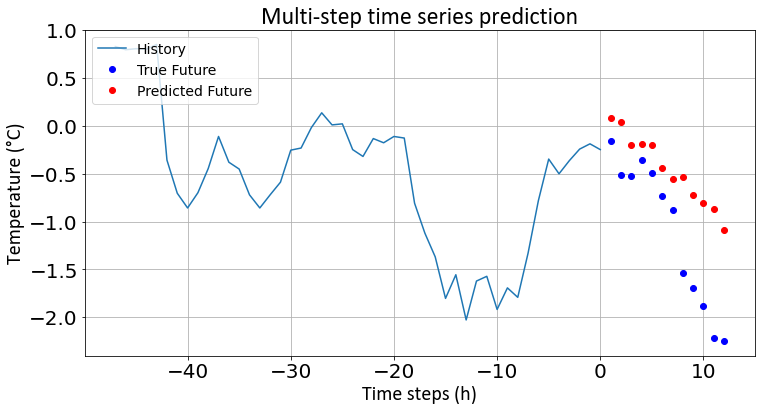

RMSE: 0.765
MAE: 0.645
ME: 1.348
SD: 0.765


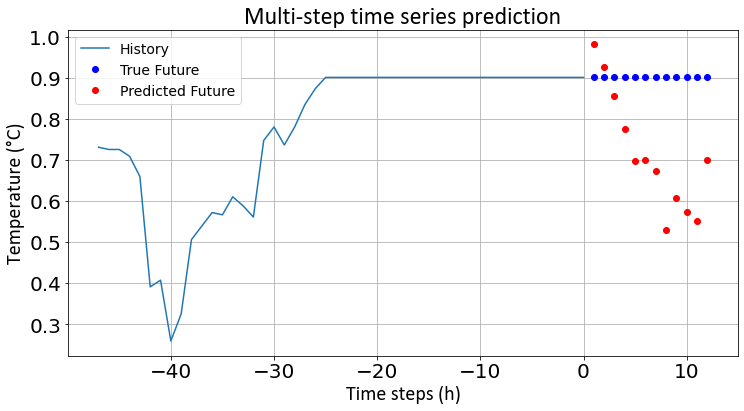

RMSE: 0.233
MAE: 0.204
ME: 0.372
SD: 0.233


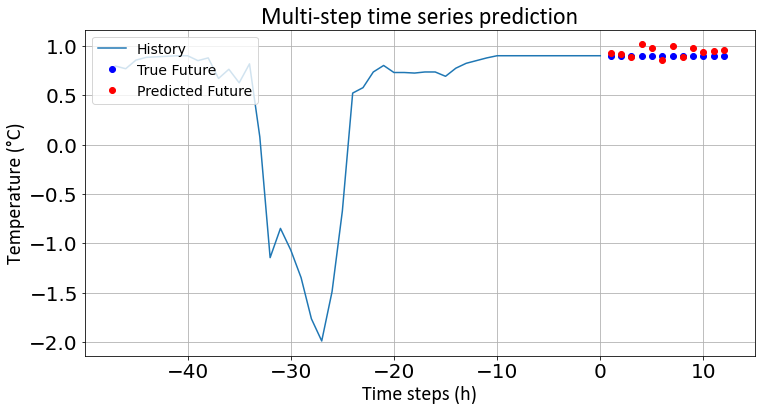

RMSE: 0.061
MAE: 0.052
ME: 0.114
SD: 0.061


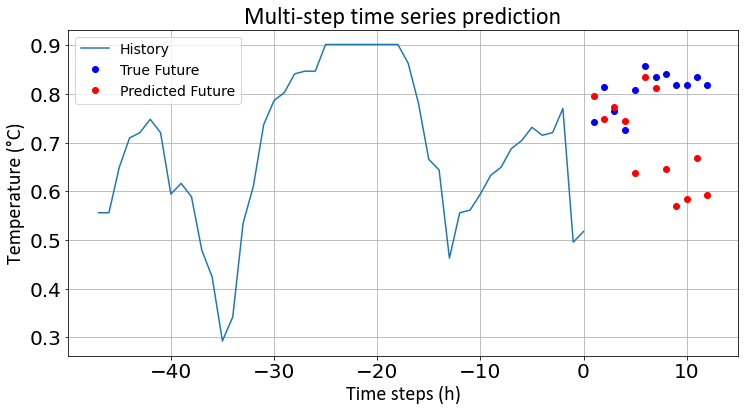

RMSE: 0.151
MAE: 0.120
ME: 0.250
SD: 0.151


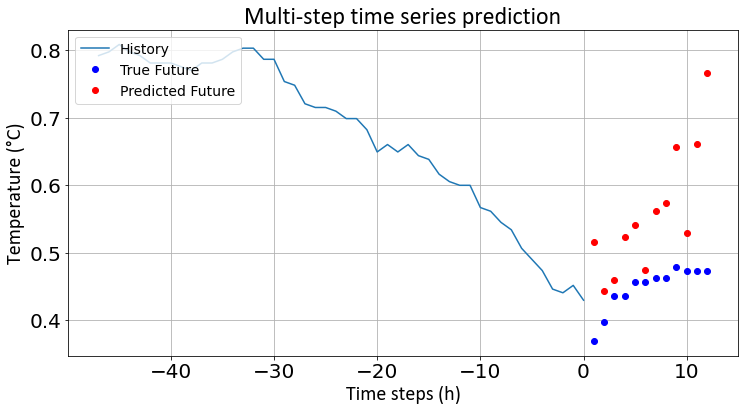

RMSE: 0.134
MAE: 0.111
ME: 0.292
SD: 0.134


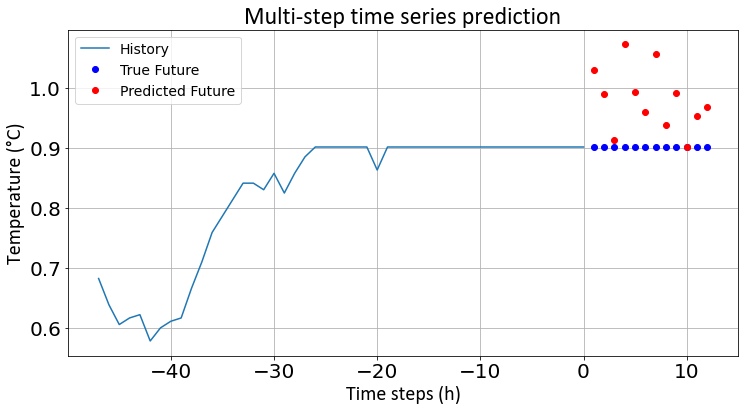

RMSE: 0.094
MAE: 0.079
ME: 0.171
SD: 0.094


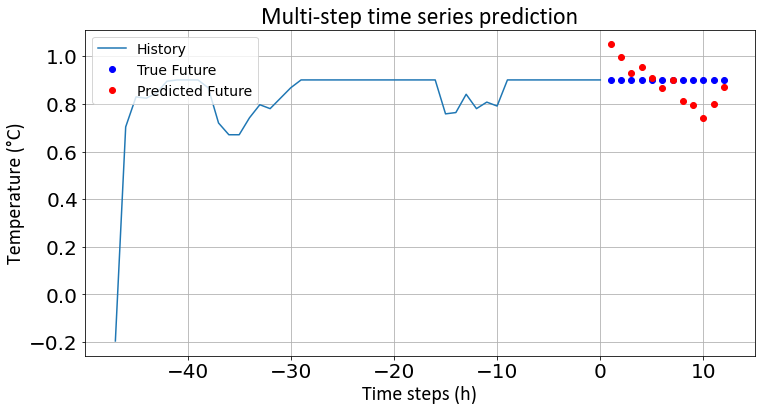

RMSE: 0.088
MAE: 0.072
ME: 0.158
SD: 0.088


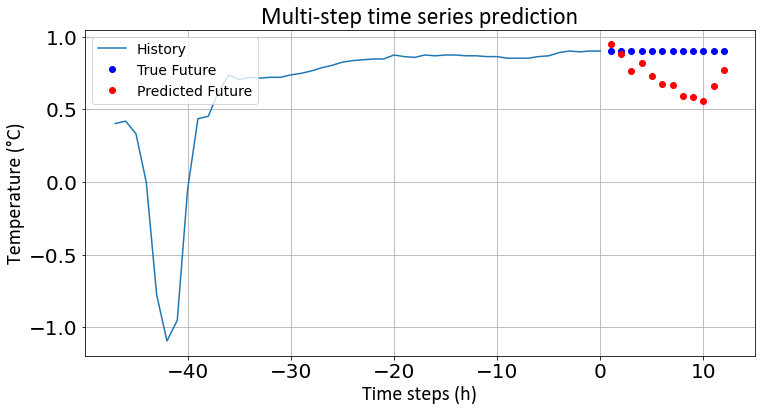

RMSE: 0.215
MAE: 0.188
ME: 0.342
SD: 0.215


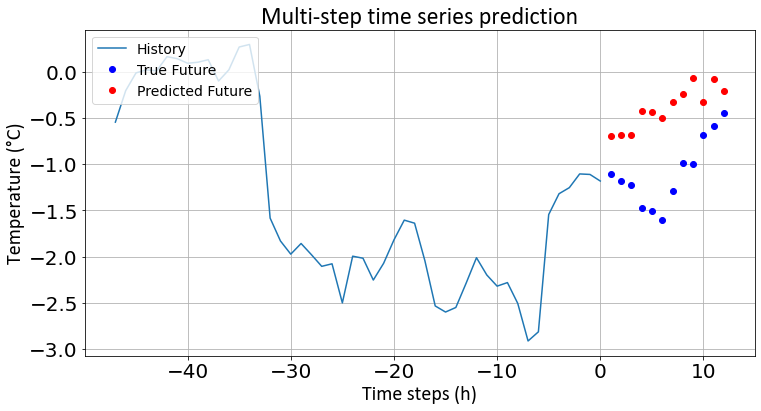

RMSE: 0.760
MAE: 0.699
ME: 1.100
SD: 0.760


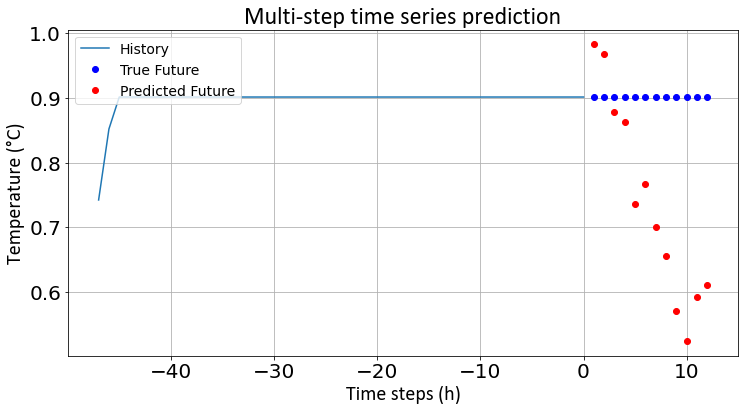

RMSE: 0.222
MAE: 0.189
ME: 0.377
SD: 0.222


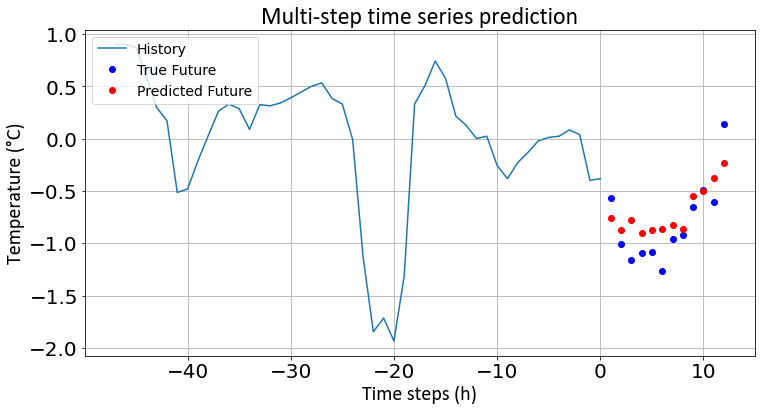

RMSE: 0.236
MAE: 0.203
ME: 0.400
SD: 0.236


In [4]:
for x, y in val_data_multi.take(50):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0], 'Multi-step time series prediction', STEP)